In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob


sns.set_style('whitegrid')

In [2]:
metrics_files = glob.glob('**/**.json')
metrics_dicts = []

for file in metrics_files:
    with open(file, 'r') as f:
        if 'roberta' not in file:
            print(file)
            metrics_dicts.append(json.load(f))


anli_r3/run-metrics-2.json
anli_r3/run-metrics-0.json
anli_r3/run-metrics-1.json
snli/run-metrics-2.json
snli/run-metrics-0.json
snli/run-metrics-1.json
mnli/run-metrics-2.json
mnli/run-metrics-0.json
mnli/run-metrics-1.json


In [3]:
anli_2 = metrics_dicts[0]
anli_0 = metrics_dicts[1]
anli_1 = metrics_dicts[2]
qnli_0 = metrics_dicts[3]
qnli_1 = metrics_dicts[4]

In [4]:
def scale_data(values):
    mn = min(values)
    mx = max(values)

    norm = mx - mn

    scaled_values = [(val - mn)/norm for val in values]
    return scaled_values

In [5]:
dicts = [anli_0, anli_1, anli_2, qnli_0, qnli_1]
dict_names = ['anli_0', 'anli_1', 'anli_2', 'qnli_0', 'qnli_1']

In [6]:
# fig, axs = plt.subplots(3, 2, figsize=(10, 8))
# for i, dic in enumerate(dicts):
#     ax = axs[i//2, i%2]
#     var_dic = dic['variance_metrics']
#     mod_dic = dic['modelling_metrics']
#     ax.plot(var_dic['subset_sizes'], var_dic['r2_values'], marker='o')
#     ax.plot(var_dic['subset_sizes'], mod_dic['test_accuracies'], marker='o')
#     ax.set_title(dict_names[i])
#     ax.set_xlabel('Subset Sizes')
#     ax.set_ylabel('R2 Values & Test accuracies')

# plt.tight_layout()
# plt.show()

In [13]:
r2_values_anli = []
r2_values_qnli = []

for i in range(10):
    val = 0
    for dic in dicts[:3]:
        val += dic['variance_metrics']['r2_values'][i]

    val /= 3
    r2_values_anli.append(val)

for i in range(10):
    val = 0
    for dic in dicts[3:]:
        val += dic['variance_metrics']['r2_values'][i]

    val /= 2
    r2_values_qnli.append(val)

In [14]:
r2_values_anli

[0.8357843961099521,
 0.8547062636842485,
 0.8624381277425558,
 0.8662743817600075,
 0.8678884856141019,
 0.8695252478867471,
 0.870642896328308,
 0.8712875091231257,
 0.8718612802529954,
 0.8724077609981694]

In [15]:
r2_values_qnli

[0.8144050768293878,
 0.817827609216653,
 0.8188291509082677,
 0.8192859779548207,
 0.819718329396508,
 0.8198577198290771,
 0.8199836594058401,
 0.8199799959296589,
 0.8201860727629893,
 0.8202775195246897]

In [36]:
test_accuracies_anli = dicts[0]['modelling_metrics']['test_accuracies']
test_losses_anli = dicts[0]['modelling_metrics']['test_losses']
subset_sizes_anli = dicts[0]['modelling_metrics']['subset_size']

test_accuracies_qnli = dicts[3]['modelling_metrics']['test_accuracies']
test_losses_qnli = dicts[3]['modelling_metrics']['test_losses']
subset_sizes_qnli = dicts[3]['modelling_metrics']['subset_size']

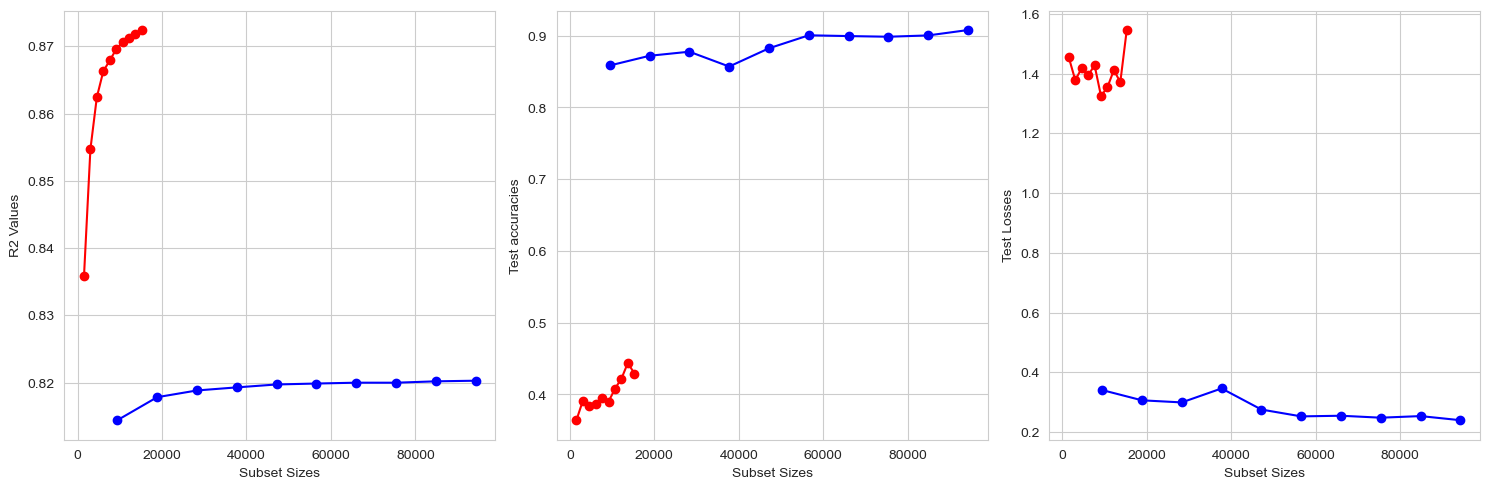

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color = ["red", "blue", "green", "orange", "purple"]

axs[0].plot(subset_sizes_anli, r2_values_anli, marker="o", color=color[0])
axs[1].plot(subset_sizes_anli, test_accuracies_anli, marker="o", color=color[0])
axs[2].plot(subset_sizes_anli, test_losses_anli, marker="o", color=color[0])

axs[0].plot(subset_sizes_qnli, r2_values_qnli, marker="o", color=color[1])
axs[1].plot(subset_sizes_qnli, test_accuracies_qnli, marker="o", color=color[1])
axs[2].plot(subset_sizes_qnli, test_losses_qnli, marker="o", color=color[1])

axs[0].set_xlabel('Subset Sizes')
axs[0].set_ylabel('R2 Values')
axs[1].set_xlabel('Subset Sizes')
axs[1].set_ylabel('Test accuracies')
axs[2].set_xlabel('Subset Sizes')
axs[2].set_ylabel('Test Losses')

plt.tight_layout()
plt.show()

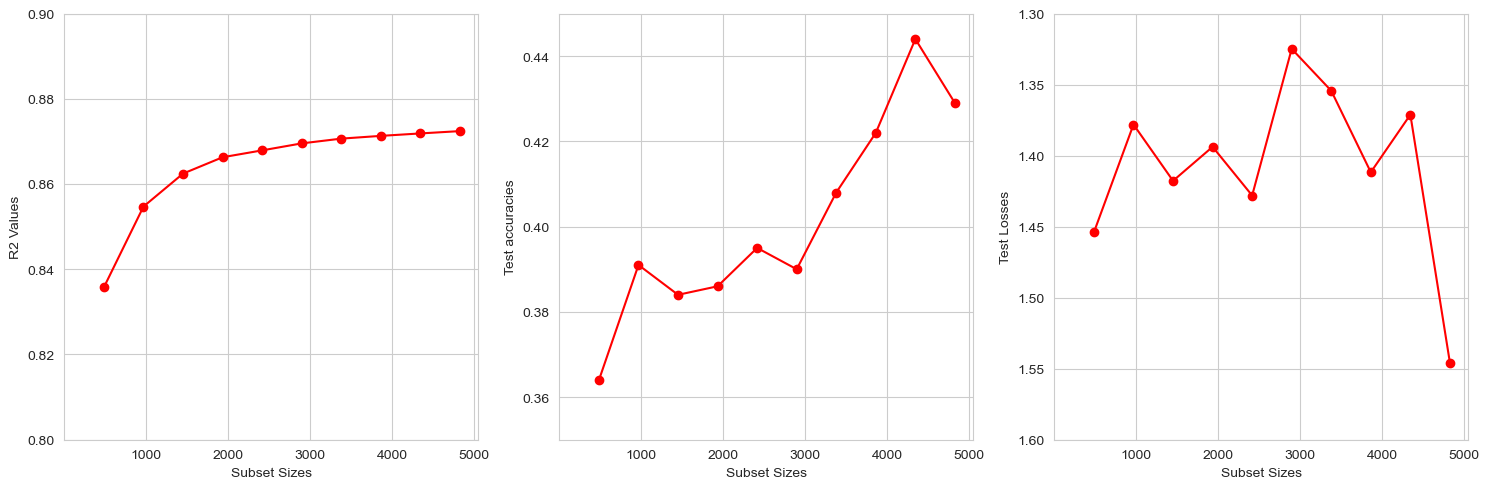

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color = ["red", "blue", "green", "orange", "purple"]

axs[0].plot(subset_sizes_anli, r2_values_anli, marker="o", color=color[0])
axs[1].plot(subset_sizes_anli, test_accuracies_anli, marker="o", color=color[0])
axs[2].plot(subset_sizes_anli, test_losses_anli, marker="o", color=color[0])

# axs[0].plot(subset_sizes_qnli, r2_values_qnli, marker="o", color=color[1])
# axs[1].plot(subset_sizes_qnli, test_accuracies_qnli, marker="o", color=color[1])
# axs[2].plot(subset_sizes_qnli, test_losses_qnli, marker="o", color=color[1])

axs[0].set_xlim(0.1)
axs[1].set_xlim(0.1)
axs[2].set_xlim(0.1)
axs[0].set_ylim(0.1)
axs[1].set_ylim(0.1)
axs[2].set_ylim(0.1)

axs[0].set_ylim(0.8, 0.9)
axs[1].set_ylim(0.35, 0.45)
axs[2].set_ylim(1.6, 1.3)



axs[0].set_xlabel('Subset Sizes')
axs[0].set_ylabel('R2 Values')
axs[1].set_xlabel('Subset Sizes')
axs[1].set_ylabel('Test accuracies')
axs[2].set_xlabel('Subset Sizes')
axs[2].set_ylabel('Test Losses')

plt.tight_layout()
plt.show()

/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

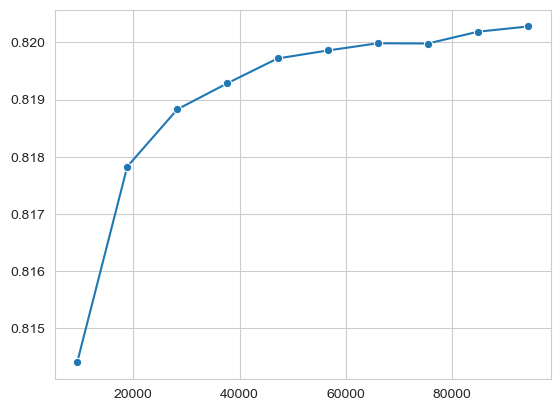

In [38]:
sns.lineplot(subset_sizes_qnli, r2_values_qnli, marker="o")

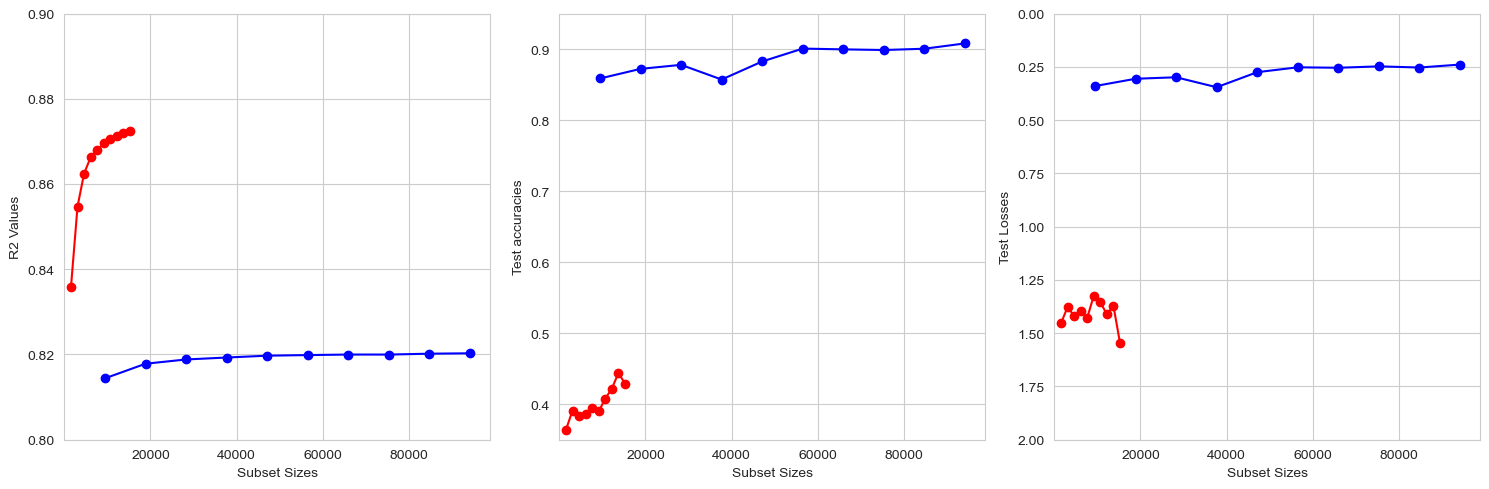

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color = ["red", "blue", "green", "orange", "purple"]

axs[0].plot(subset_sizes_anli, r2_values_anli, marker="o", color=color[0])
axs[1].plot(subset_sizes_anli, test_accuracies_anli, marker="o", color=color[0])
axs[2].plot(subset_sizes_anli, test_losses_anli, marker="o", color=color[0])

axs[0].plot(subset_sizes_qnli, r2_values_qnli, marker="o", color=color[1])
axs[1].plot(subset_sizes_qnli, test_accuracies_qnli, marker="o", color=color[1])
axs[2].plot(subset_sizes_qnli, test_losses_qnli, marker="o", color=color[1])

axs[0].set_xlim(0.1)
axs[1].set_xlim(0.1)
axs[2].set_xlim(0.1)
axs[0].set_ylim(0.1)
axs[1].set_ylim(0.1)
axs[2].set_ylim(0.1)

axs[0].set_ylim(0.8, 0.9)
axs[1].set_ylim(0.35, 0.95)
axs[2].set_ylim(2.0, 0.0)



axs[0].set_xlabel('Subset Sizes')
axs[0].set_ylabel('R2 Values')
axs[1].set_xlabel('Subset Sizes')
axs[1].set_ylabel('Test accuracies')
axs[2].set_xlabel('Subset Sizes')
axs[2].set_ylabel('Test Losses')

plt.tight_layout()
plt.show()

In [3]:
snli_df = pd.read_csv('./analysis_results/snli.csv')
mnli_df = pd.read_csv('./analysis_results/mnli.csv')
anli_r3_df = pd.read_csv('./analysis_results/anli_r3.csv')

In [4]:
snli_df['percent'] = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
mnli_df['percent'] = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
anli_r3_df['percent'] = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']

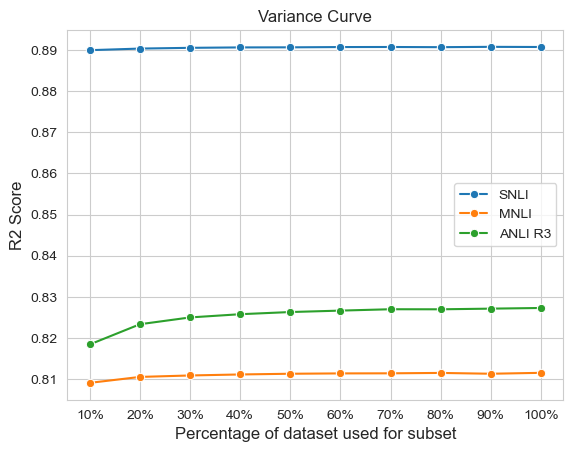

In [19]:
import matplotlib.patches as mpatches

plot = sns.lineplot(x=snli_df['percent'], y=snli_df['r2_value'], marker='o')
sns.lineplot(x=mnli_df['percent'], y=mnli_df['r2_value'], marker='o')
sns.lineplot(x=anli_r3_df['percent'], y=anli_r3_df['r2_value'], marker='o')


plt.gca().set_xlabel('Percentage of dataset used for subset', fontsize=12)
plt.gca().set_ylabel('R2 Score', fontsize=12)

plt.title('Variance Curve')


plt.legend(['SNLI', 'MNLI', 'ANLI R3'], loc='center right')

plt.savefig("./analysis_results/plots/bert_variance_analysis.png", dpi=600, bbox_inches='tight')

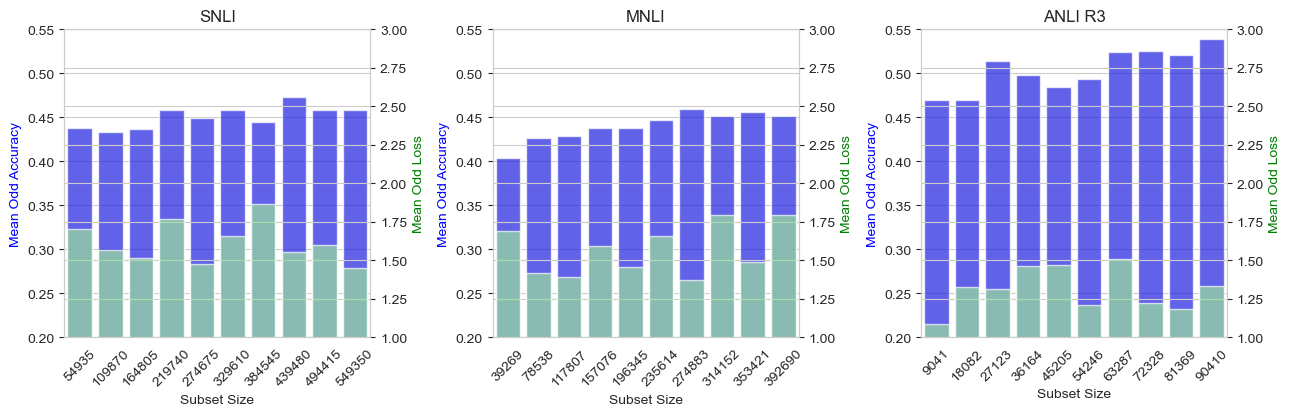

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plot = sns.barplot(x=snli_df['subset_size'], y=snli_df['mean_odd_accuracy'], alpha=0.7, color='blue', ax=axes[0])
plot.set_ylim(0.2, 0.55)
ax1 = axes[0].twinx()
plot = sns.barplot(x=snli_df['subset_size'], y=snli_df['mean_odd_loss'], alpha=0.7, color='lightgreen', ax=ax1)
ax1.set_ylim(1.0, 3.0)
axes[0].set_title('SNLI')

plot = sns.barplot(x=mnli_df['subset_size'], y=mnli_df['mean_odd_accuracy'], alpha=0.7, color='blue', ax=axes[1])
plot.set_ylim(0.2, 0.55)
ax2 = axes[1].twinx()
plot = sns.barplot(x=mnli_df['subset_size'], y=mnli_df['mean_odd_loss'], alpha=0.7, color='lightgreen', ax=ax2)
ax2.set_ylim(1.0, 3.0)
axes[1].set_title('MNLI')

plot = sns.barplot(x=anli_r3_df['subset_size'], y=anli_r3_df['mean_odd_accuracy'], alpha=0.7, color='blue', ax=axes[2])
plot.set_ylim(0.2, 0.55)
ax3 = axes[2].twinx()
plot = sns.barplot(x=anli_r3_df['subset_size'], y=anli_r3_df['mean_odd_loss'], alpha=0.7, color='lightgreen', ax=ax3)
ax3.set_ylim(1.0, 3.0)
axes[2].set_title('ANLI R3')

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.4)

axes[0].yaxis.label.set_color('blue')
ax1.yaxis.label.set_color('green')
axes[1].yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('green')
axes[2].yaxis.label.set_color('blue')
ax3.yaxis.label.set_color('green')

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xlabel(ax.get_xlabel().replace('_', ' ').title())
    ax.set_ylabel(ax.get_ylabel().replace('_', ' ').title())

plt.savefig("./analysis_results/plots/bert_odd.png", dpi=600, bbox_inches='tight')

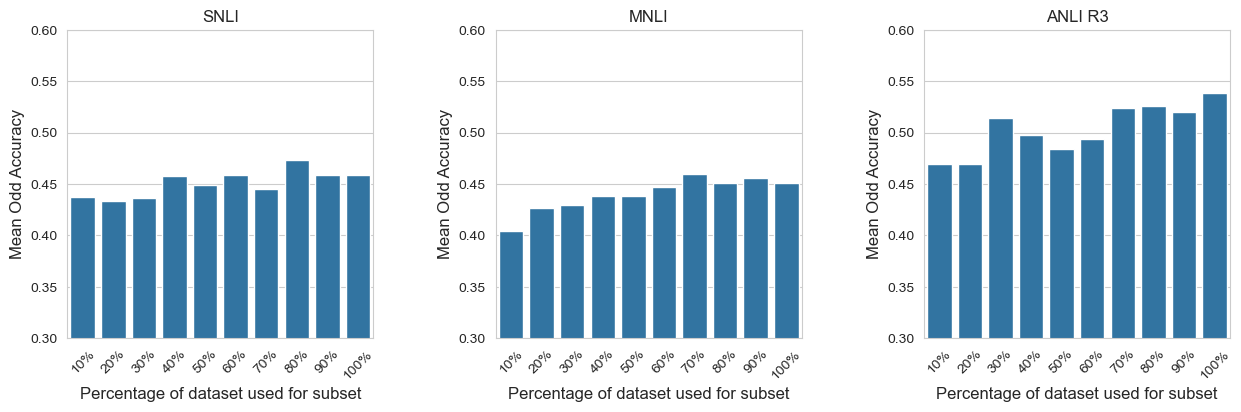

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

color = sns.color_palette("tab10")[0]
color2 = sns.color_palette("tab10")[0]


plot = sns.barplot(x=snli_df['percent'], y=snli_df['mean_odd_accuracy'], ax=axes[0], color=color)
plot.set_ylim(0.3, 0.6)
axes[0].set_title('SNLI')

plot = sns.barplot(x=mnli_df['percent'], y=mnli_df['mean_odd_accuracy'], ax=axes[1], color=color)
plot.set_ylim(0.3, 0.6)
axes[1].set_title('MNLI')

plot = sns.barplot(x=anli_r3_df['percent'], y=anli_r3_df['mean_odd_accuracy'], ax=axes[2], color=color)
plot.set_ylim(0.3, 0.6)
axes[2].set_title('ANLI R3')

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.4)

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xlabel('Percentage of dataset used for subset', fontsize=12)
    ax.set_ylabel(ax.get_ylabel().replace('_', ' ').title(), fontsize=12)

plt.savefig("./analysis_results/plots/bert_odd_only_acc.png", dpi=600, bbox_inches='tight')